<a href="https://colab.research.google.com/github/aruna-1985/aruna_akula/blob/master/HousepriceLaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Houseprice train.csv to Houseprice train.csv


In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Houseprice test.csv to Houseprice test.csv


In [ ]:
train = pd.read_csv("Houseprice train.csv")
test = pd.read_csv("Houseprice test.csv")

In [ ]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train['POSTED_BY'] = number.fit_transform(train['POSTED_BY'].astype('str'))
test['POSTED_BY'] = number.fit_transform(test['POSTED_BY'].astype('str'))
train.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,2,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,2,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,1,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train['ADDRESS'] = number.fit_transform(train['ADDRESS'].astype('str'))
test['ADDRESS'] = number.fit_transform(test['ADDRESS'].astype('str'))
train.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,BHK,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,2,BHK,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,2,BHK,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,2,BHK,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,2,BHK,999.009247,0,1,3830,22.592200,88.484911,60.5


In [ ]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train['BHK_OR_RK'] = number.fit_transform(train['BHK_OR_RK'].astype('str'))
test['BHK_OR_RK'] = number.fit_transform(test['BHK_OR_RK'].astype('str'))
train.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,3830,22.592200,88.484911,60.5


In [ ]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,3830,22.592200,88.484911,60.5


In [ ]:
train_X = train.drop(columns= ["POSTED_BY","BHK_OR_RK", "ADDRESS"])



In [ ]:
test_X = train.drop(columns= ["POSTED_BY","BHK_OR_RK", "ADDRESS"])


In [ ]:
train_y = train["POSTED_BY"]

In [ ]:
len(test_X.columns)

9

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Houseprice sample_submission.csv to Houseprice sample_submission.csv


In [ ]:
sample= pd.read_csv("Houseprice sample_submission.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
     model.fit(train_X, train_y)
     pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
     pred_train = model.predict(train_X)
     pred_test = model.predict(test_X)
     pred_test = abs(pred_test)
     print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
     score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
     print("Cross validation Score = ",np.mean(np.abs(score)))
     sample["ADDRESS"] = pred_test
     sample.to_csv(filename, index = False)

RMSE of Train Data =  0.469579668517302
Cross validation Score =  0.4701209145291254


ValueError: ignored

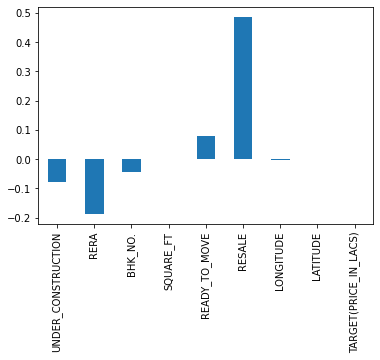

In [ ]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression.csv" )

RMSE of Train Data =  0.46958401550608325
Cross validation Score =  0.4701384489938302


ValueError: ignored

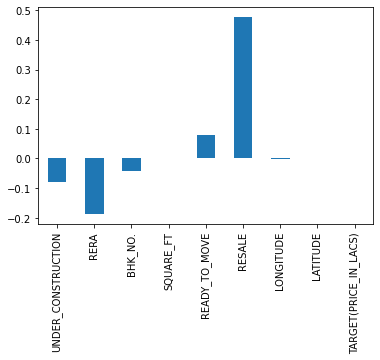

In [ ]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Ridge_regression.csv" )

RMSE of Train Data =  0.5149389961500569
Cross validation Score =  0.515159476896982


ValueError: ignored

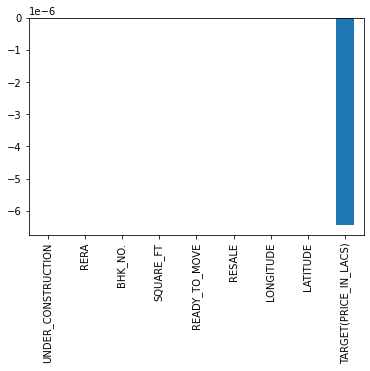

In [ ]:
model = Lasso(alpha=30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Lasso_regression.csv" )